# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

%matplotlib inline

In [3]:
sys.float_info.min

2.2250738585072014e-308

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
sinasc_raw = pd.read_csv('./data/SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [68]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORIGEM           27028 non-null  int64         
 1   CODESTAB         26913 non-null  float64       
 2   CODMUNNASC       27028 non-null  int64         
 3   LOCNASC          27028 non-null  int64         
 4   IDADEMAE         27028 non-null  int64         
 5   ESTCIVMAE        26711 non-null  float64       
 6   ESCMAE           26716 non-null  object        
 7   CODOCUPMAE       24121 non-null  float64       
 8   QTDFILVIVO       25455 non-null  float64       
 9   QTDFILMORT       24930 non-null  float64       
 10  CODMUNRES        27028 non-null  int64         
 11  GESTACAO         25796 non-null  object        
 12  GRAVIDEZ         26949 non-null  object        
 13  PARTO            26979 non-null  object        
 14  CONSULTAS        27028 non-null  int64

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
sinasc_raw['group_munResLat'] = pd.cut(sinasc_raw['munResLat'],[-99,-10.5,99])

In [8]:
sinasc_raw[['group_munResLat','QTDFILVIVO','QTDFILMORT']].groupby('group_munResLat').describe()

QTDFILVIVO                                                \
                     count      mean       std  min  25%  50%  75%   max   
group_munResLat                                                            
(-99.0, -10.5]     12857.0  0.980011  1.138300  0.0  0.0  1.0  1.0  30.0   
(-10.5, 99.0]      12597.0  1.129317  1.198613  0.0  0.0  1.0  2.0  12.0   

                QTDFILMORT                                                
                     count      mean       std  min  25%  50%  75%   max  
group_munResLat                                                           
(-99.0, -10.5]     12803.0  0.242521  0.599430  0.0  0.0  0.0  0.0  28.0  
(-10.5, 99.0]      12126.0  0.291770  0.627856  0.0  0.0  0.0  0.0   9.0

In [12]:
agg_func = ['sum','mean','min','max','median','std','var']
sinasc_raw[['group_munResLat','QTDFILVIVO','QTDFILMORT']].groupby('group_munResLat').agg(agg_func)

QTDFILVIVO                                                  \
                       sum      mean  min   max median       std       var   
group_munResLat                                                              
(-99.0, -10.5]     12600.0  0.980011  0.0  30.0    1.0  1.138300  1.295727   
(-10.5, 99.0]      14226.0  1.129317  0.0  12.0    1.0  1.198613  1.436674   

                QTDFILMORT                                                  
                       sum      mean  min   max median       std       var  
group_munResLat                                                             
(-99.0, -10.5]      3105.0  0.242521  0.0  28.0    0.0  0.599430  0.359317  
(-10.5, 99.0]       3538.0  0.291770  0.0   9.0    0.0  0.627856  0.394204

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [10]:
area = pd.cut(sinasc_raw['munResArea'],[0,3000,999999])

In [13]:
sinasc_raw.pivot_table(['QTDFILVIVO','QTDFILMORT'],area,aggfunc={'sum','mean','min','max','median','std','var'})
sinasc_raw.pivot_table(['QTDFILVIVO','QTDFILMORT'],area,aggfunc={'QTDFILVIVO':agg_func,'QTDFILMORT':agg_func})

QTDFILMORT                                                    \
                      max      mean median  min       std     sum       var   
munResArea                                                                    
(0, 3000]             4.0  0.244803    0.0  0.0  0.551215  1260.0  0.303838   
(3000, 999999]       28.0  0.272116    0.0  0.0  0.629081  5383.0  0.395743   

               QTDFILVIVO                                                     
                      max      mean median  min       std      sum       var  
munResArea                                                                    
(0, 3000]            30.0  0.924284    1.0  0.0  1.075442   4773.0  1.156575  
(3000, 999999]       14.0  1.086890    1.0  0.0  1.191750  22053.0  1.420268

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [14]:
altitude = pd.cut(sinasc_raw['munResAlt'],4,include_lowest=True)
sinasc_raw.pivot_table(['QTDFILVIVO','QTDFILMORT'],altitude,aggfunc={'sum','mean','min','max','median','std','var'})

QTDFILMORT                                          \
                                  max      mean median  min       std     sum   
munResAlt                                                                       
(84.48899999999999, 212.5]        9.0  0.274458    0.0  0.0  0.602997  5277.0   
(212.5, 340.0]                    4.0  0.235826    0.0  0.0  0.538966   886.0   
(340.0, 467.5]                    3.0  0.225895    0.0  0.0  0.518915    82.0   
(467.5, 595.0]                   28.0  0.251580    0.0  0.0  0.874790   398.0   

                                     QTDFILVIVO                        \
                                 var        max      mean median  min   
munResAlt                                                               
(84.48899999999999, 212.5]  0.363606       14.0  1.083739    1.0  0.0   
(212.5, 340.0]              0.290484       30.0  0.967322    1.0  0.0   
(340.0, 467.5]              0.269272        8.0  0.923497    1.0  0.0   
(467.5, 595.0]              0.765257       10.0  0.917929    1.0  0.0   

                                                         
                                 std      sum       var  
munResAlt                                                
(84.48899999999999, 212.5]  1.189961  21393.0  1.416008  
(212.5, 340.0]              1.129765   3641.0  1.276370  
(340.0, 467.5]              1.057080    338.0  1.117419  
(467.5, 595.0]              1.021973   1454.0  1.044429

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [15]:
intermediarias = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Porto Velho",
    "Alto Paraíso": "Porto Velho",
    "Ariquemes": "Porto Velho",
    "Buritis": "Porto Velho",
    "Cacaulândia": "Porto Velho",
    "Campo Novo de Rondônia": "Porto Velho",
    "Cujubim": "Porto Velho",
    "Monte Negro": "Porto Velho",
    "Rio Crespo": "Porto Velho",
    "Jaru": "Porto Velho",
    "Governador Jorge Teixeira": "Porto Velho",
    "Machadinho D'Oeste": "Porto Velho",
    "Theobroma": "Porto Velho",
    "Vale do Anari": "Porto Velho",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Ji-Paraná",
    "Alta Floresta D'Oeste": "Ji-Paraná",
    "Alto Alegre dos Parecis": "Ji-Paraná",
    "Castanheiras": "Ji-Paraná",
    "Espigão D'Oeste": "Ji-Paraná",
    "Ministro Andreazza": "Ji-Paraná",
    "Nova Brasilândia D'Oeste": "Ji-Paraná",
    "Novo Horizonte do Oeste": "Ji-Paraná",
    "Parecis": "Ji-Paraná",
    "Pimenta Bueno": "Ji-Paraná",
    "Primavera de Rondônia": "Ji-Paraná",
    "Rolim de Moura": "Ji-Paraná",
    "Santa Luzia D'Oeste": "Ji-Paraná",
    "São Felipe D'Oeste": "Ji-Paraná",
    "Vilhena": "Ji-Paraná",
    "Cabixi": "Ji-Paraná",
    "Cerejeiras": "Ji-Paraná",
    "Chupinguaia": "Ji-Paraná",
    "Colorado do Oeste": "Ji-Paraná",
    "Corumbiara": "Ji-Paraná",
    "Pimenteiras do Oeste": "Ji-Paraná"
}

In [16]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'],format = '%Y-%M-%d')

<AxesSubplot:xlabel='DTNASC'>

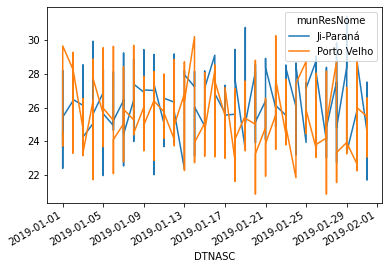

In [34]:
pd.pivot_table(sinasc_raw,values='IDADEMAE',index='munResNome',columns='DTNASC').groupby(intermediarias).mean().transpose().plot()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [72]:
idh = {
    "Alta Floresta D'Oeste": "IDH-M médio",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Alto Paraíso": "IDH-M médio",
    "Alvorada D'Oeste": "IDH-M médio",
    "Ariquemes": "IDH-M alto",
    "Buritis": "IDH-M médio",
    "Cabixi": "IDH-M médio",
    "Cacaulândia": "IDH-M médio",
    "Cacoal": "IDH-M alto",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Candeias do Jamari": "IDH-M médio",
    "Castanheiras": "IDH-M médio",
    "Cerejeiras": "IDH-M médio",
    "Chupinguaia": "IDH-M médio",
    "Colorado do Oeste": "IDH-M médio",
    "Corumbiara": "IDH-M médio",
    "Costa Marques": "IDH-M médio",
    "Cujubim": "IDH-M médio",
    "Espigão D'Oeste": "IDH-M médio",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Guajará-Mirim": "IDH-M médio",
    "Itapuã do Oeste": "IDH-M médio",
    "Jaru": "IDH-M médio",
    "Ji-Paraná": "IDH-M alto",
    "Machadinho D'Oeste": "IDH-M baixo",
    "Ministro Andreazza": "IDH-M médio",
    "Mirante da Serra": "IDH-M médio",
    "Monte Negro": "IDH-M médio",
    "Nova Brasilândia D'Oeste": "IDH-M médio",
    "Nova Mamoré": "IDH-M baixo",
    "Nova União": "IDH-M baixo",
    "Novo Horizonte do Oeste": "IDH-M médio",
    "Ouro Preto do Oeste": "IDH-M médio",
    "Parecis": "IDH-M médio",
    "Pimenta Bueno": "IDH-M alto",
    "Pimenteiras do Oeste": "IDH-M médio",
    "Porto Velho": "IDH-M alto",
    "Presidente Médici": "IDH-M médio",
    "Primavera de Rondônia": "IDH-M médio",
    "Rio Crespo": "IDH-M médio",
    "Rolim de Moura": "IDH-M alto",
    "Santa Luzia D'Oeste": "IDH-M médio",
    "São Felipe D'Oeste": "IDH-M médio",
    "São Francisco do Guaporé": "IDH-M médio",
    "São Miguel do Guaporé": "IDH-M médio",
    "Seringueiras": "IDH-M baixo",
    "Teixeirópolis": "IDH-M médio",
    "Theobroma": "IDH-M baixo",
    "Urupá": "IDH-M médio",
    "Vale do Anari": "IDH-M baixo",
    "Vale do Paraíso": "IDH-M médio",
    "Vilhena": "IDH-M alto",    
}

In [42]:
sinasc_raw.set_index('munResNome')[['IDADEMAE','ESCMAE']].groupby(idh).count()

,IDADEMAE,ESCMAE
munResNome,,
IDH-M alto,15126,14906
IDH-M baixo,1826,1807
IDH-M médio,8346,8276
Porto Velho,1729,1726


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [43]:
ifdm = {
    "Ariquemes":"Desenvolvimento Alto",
    "Vilhena":"Desenvolvimento Alto",
    "Pimenta Bueno":"Desenvolvimento Alto",
    "Porto Velho":"Desenvolvimento Alto",
    "Ji-Paraná":"Desenvolvimento Alto",
    "Cacoal":"Desenvolvimento Alto",
    "Santa Luzia d'Oeste":"Desenvolvimento Alto",
    "Rolim de Moura":"Desenvolvimento Alto",
    "Chupinguaia":"Desenvolvimento Alto",
    "São Miguel do Guaporé":"Desenvolvimento Alto",
    "Pimenteiras do Oeste":"Desenvolvimento Alto",
    "Teixeirópolis":"Desenvolvimento Alto",
    "Colorado do Oeste":"Desenvolvimento Alto",
    "Jaru":"Desenvolvimento Alto",
    "Rio Crespo":"Desenvolvimento Alto",
    "Primavera de Rondônia":"Desenvolvimento Alto",
    "Alta Floresta d'Oeste":"Desenvolvimento Alto",
    "Ouro Preto do Oeste":"Desenvolvimento Alto",
    "São Francisco do Guaporé":"Desenvolvimento Alto",
    "Candeias do Jamari":"Desenvolvimento Alto",
    "Buritis":"Desenvolvimento Alto",
    "São Felipe d'Oeste":"Desenvolvimento Alto",
    "Presidente Médici":"Desenvolvimento Alto",
    "Cerejeiras":"Desenvolvimento Alto",
    "Monte Negro":"Desenvolvimento Alto",
    "Urupá":"Desenvolvimento Alto",
    "Espigão d'Oeste":"Desenvolvimento regular",
    "Seringueiras":"Desenvolvimento regular",
    "Alvorada d'Oeste":"Desenvolvimento regular",
    "Itapuã do Oeste":"Desenvolvimento regular",
    "Cabixi":"Desenvolvimento regular",
    "Novo Horizonte do Oeste":"Desenvolvimento regular",
    "Nova Brasilândia d'Oeste":"Desenvolvimento regular",
    "Vale do Paraíso":"Desenvolvimento regular",
    "Corumbiara":"Desenvolvimento regular",
    "Alto Paraíso":"Desenvolvimento regular",
    "Cacaulândia":"Desenvolvimento regular",
    "Vale do Anari":"Desenvolvimento regular",
    "Ministro Andreazza":"Desenvolvimento regular",
    "Costa Marques":"Desenvolvimento regular",
    "Nova União":"Desenvolvimento regular",
    "Guajará-Mirim":"Desenvolvimento regular",
    "Mirante da Serra":"Desenvolvimento regular",
    "Parecis":"Desenvolvimento regular",
    "Castanheiras":"Desenvolvimento regular",
    "Theobroma":"Desenvolvimento regular",
    "Machadinho d'Oeste":"Desenvolvimento regular",
    "Campo Novo de Rondônia":"Desenvolvimento regular",
    "Nova Mamoré":"Desenvolvimento regular",
    "Cujubim":"Desenvolvimento regular",
    "Alto Alegre dos Parecis":"Desenvolvimento regular",
    "Governador Jorge Teixeira":"Desenvolvimento regular",
}

In [45]:
sinasc_raw.set_index('munResNome')[['IDADEMAE','ESCMAE']].groupby(ifdm).count()

,IDADEMAE,ESCMAE
munResNome,,
Desenvolvimento Alto,21426,21161
Desenvolvimento regular,3665,3637


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [49]:
pib = {
    "Porto Velho":"Acima de 1 bilhão",
    "Ji-Paraná":"Acima de 1 bilhão",
    "Vilhena":"Acima de 1 bilhão",
    "Ariquemes":"Acima de 1 bilhão",
    "Cacoal":"Acima de 1 bilhão",
    "Jaru":"Acima de 1 bilhão",
    "Rolim de Moura":"Acima de 1 bilhão",
    "Pimenta Bueno":"Acima de 1 bilhão",
    "Guajará-Mirim":"Acima de 500 milhões",
    "Ouro Preto do Oeste":"Acima de 500 milhões",
    "Buritis":"Acima de 500 milhões",
    "Machadinho do Oeste":"Acima de 500 milhões",
    "Espigão d'Oeste":"Acima de 500 milhões",
    "São Miguel do Guaporé":"Acima de 500 milhões",
    "Candeias do Jamari":"Acima de 500 milhões",
    "Nova Mamoré":"Acima de 500 milhões",
    "Cerejeiras":"Acima de 500 milhões",
    "Alta Floresta do Oeste":"Acima de 300 milhões",
    "Presidente Médici":"Acima de 300 milhões",
    "Cujubim":"Acima de 300 milhões",
    "Nova Brasilândia do Oeste":"Acima de 300 milhões",
    "Alto Paraíso":"Acima de 300 milhões",
    "São Francisco do Guaporé":"Acima de 300 milhões",
    "Colorado do Oeste":"Acima de 300 milhões",
    "Monte Negro":"Acima de 200 milhões",
    "Alto Alegre dos Parecis":"Acima de 200 milhões",
    "Campo Novo de Rondônia":"Acima de 200 milhões",
    "Alvorada do Oeste":"Acima de 200 milhões",
    "Chupinguaia":"Acima de 100 milhões",
    "Corumbiara":"Acima de 100 milhões",
    "Ministro Andreazza":"Acima de 100 milhões",
    "Urupá":"Acima de 100 milhões",
    "Costa Marques":"Acima de 100 milhões",
    "Seringueiras":"Acima de 100 milhões",
    "Mirante da Serra":"Acima de 100 milhões",
    "Governador Jorge Teixeira":"Acima de 100 milhões",
    "Theobroma":"Acima de 100 milhões",
    "Santa Luzia do Oeste":"Acima de 100 milhões",
    "Novo Horizonte do Oeste":"Acima de 100 milhões",
    "Itapuã do Oeste":"Acima de 100 milhões",
    "Vale do Paraíso":"Acima de 100 milhões",
    "Cacaulândia":"Acima de 100 milhões",
    "Cabixi":"Acima de 100 milhões",
    "Vale do Anari":"Acima de 100 milhões",
    "Nova União":"Até 100 milhões",
    "Parecis":"Até 100 milhões",
    "Rio Crespo":"Até 100 milhões",
    "Pimenteiras do Oeste":"Até 100 milhões",
    "Teixeirópolis":"Até 100 milhões",
    "São Felipe do Oeste":"Até 100 milhões",
    "Castanheiras":"Até 100 milhões",
    "Primavera de Rondônia":"Até 100 milhões",
}

In [50]:
sinasc_raw.set_index('munResNome')[['IDADEMAE','ESCMAE']].groupby(pib).count()

,IDADEMAE,ESCMAE
munResNome,,
Acima de 1 bilhão,17736,17508
Acima de 100 milhões,1853,1836
Acima de 200 milhões,519,503
Acima de 300 milhões,1252,1243
Acima de 500 milhões,3354,3333
Até 100 milhões,377,375


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [54]:
sinasc_raw.set_index('munResNome')[['IDADEMAE','ESCMAE']].groupby(idh).mean()

,IDADEMAE
munResNome,
IDH-M alto,26.357200
IDH-M baixo,25.326944
IDH-M médio,25.884855
Porto Velho,25.607866


In [55]:
sinasc_raw.set_index('munResNome')[['IDADEMAE','ESCMAE']].groupby(ifdm).mean()

,IDADEMAE
munResNome,
Desenvolvimento Alto,26.226921
Desenvolvimento regular,25.412005


In [74]:
sinasc_raw.set_index('munResNome')[['APGAR1','APGAR5']].groupby(idh).agg(['median','mean','count','min','max','std'])

APGAR1                                       APGAR5            \
            median      mean  count  min   max       std median      mean   
munResNome                                                                  
IDH-M alto     8.0  8.172839  16796  0.0  10.0  0.961518    9.0  9.171668   
IDH-M baixo    8.0  8.017014   1822  0.0  10.0  1.040232    9.0  9.172527   
IDH-M médio    8.0  8.092265   8313  0.0  10.0  1.014941    9.0  9.195668   

                                         
             count  min   max       std  
munResNome                               
IDH-M alto   16794  0.0  10.0  0.758370  
IDH-M baixo   1820  1.0  10.0  0.860797  
IDH-M médio   8310  0.0  10.0  0.836771

   - Dentre as cidades com os menores IDH-M  o APGAR1 tem uma média um pouco menor e um desvio padrão levemente maior, com o resultado semelhante porém menos expressivo no APGAR5.